In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sus


sus.set_theme(style="whitegrid", context="notebook")


# Data Import
• ID - Уникальный Идентификатор  
• Customer_ID - Идентификатор клиента  
• Month - Месяц  
• Name - Имя клиента  
• Age - Возраст клиента  
• SSN - Номер социального страхования  
• Occupation - Профессия  
• Annual_Income - Годовой доход  
• Monthly_Inhand_Salary - Ежемесячный доход  
• Num_Bank_Accounts - Число банковских аккаунтов  
• Num_Credit_Card - Номер кредитной карты  
• Interest_Rate - Процентная ставка  
• Num_of_Loan - Номер кредита  
• Type_of_Loan - Тип кредита  
• Delay_from_due_date - Срок отсрочки платежа  
• Num_of_Delayed_Payment - Номер_сроченного платежа  
• Changed_Credit_Limit - Изменен ли лимит кредита  
• Num_Credit_Inquiries - Число кредитных запросов  
• Credit_Mix - Сумма кредита  
• Outstanding_Debt - Превышение долга  
• Credit_Utilization_Ratio - Коэффициент использования кредита  
• Credit_History_Age - Возраст кредита  
• Payment_of_Min_Amount - Сумма платежа из минимальной суммы  
• Total_EMI_per_month - Платежей за месяц  
• Amount_invested_monthly - Сумма инвестирований помесячно  
• Payment_Behaviour - Платежное поведение  
• Monthly_Balance - Месячный баланс  
• Credit_Score - Кредитный рейтинг

In [3]:
df = pd.read_csv("../data/raw/train.csv")
df_clean = pd.read_csv("../data/new/train_backup.csv")

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
df.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000,91216.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,10.389025,27.754251,32.285173,1403.118217,195.539456,401.755494
std,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,6.789496,193.177339,5.116875,8306.041270,199.564527,212.750017
min,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000,0.000000,0.007760
25%,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,5.320000,3.000000,28.052567,30.306660,72.236692,270.913865
50%,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,9.400000,6.000000,32.305784,69.249473,128.954538,336.731225
75%,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,14.870000,9.000000,36.496663,161.224249,236.815814,467.670597
max,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000,1977.326102,1602.040519


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [11]:
def plot_numeric_before_after_seaborn(df, df_clean, col, bins=60):
    raw = pd.to_numeric(df[col], errors="coerce")
    clean = pd.to_numeric(df_clean[col], errors="coerce")

    plot_df = pd.DataFrame({
        col: pd.concat([raw, clean], ignore_index=True),
        "stage": (["Before"] * len(raw)) + (["After"] * len(clean)),
    }).dropna()

    plt.figure(figsize=(14, 4))
    sus.histplot(
        data=plot_df,
        x=col,
        hue="stage",
        bins=bins,
        kde=True,
        element="step",
        stat="count",
        common_norm=False
    )
    plt.title(f"{col}: before vs after cleaning")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 3))
    sus.boxplot(data=plot_df, x=col, y="stage", orient="h")
    plt.title(f"{col}: outliers/range before vs after")
    plt.xlabel(col)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


In [18]:
def plot_category_before_after_seaborn(df, df_clean, col, topn=12):
    raw = df[col].astype("string")
    clean = df_clean[col].astype("string")

    vc_raw = raw.value_counts(dropna=False).head(topn)
    vc_clean = clean.value_counts(dropna=False).head(topn)

    raw_df = vc_raw.reset_index()
    raw_df.columns = [col, "count"]
    raw_df["stage"] = "Before"

    clean_df = vc_clean.reset_index()
    clean_df.columns = [col, "count"]
    clean_df["stage"] = "After"

    plot_df = pd.concat([raw_df, clean_df], ignore_index=True)
    plot_df[col] = plot_df[col].astype(str)

    g = sus.catplot(
        data=plot_df,
        kind="bar",
        x="count",
        y=col,
        col="stage",
        height=4,
        aspect=1.4,
        sharey=False
    )
    g.set_titles("{col_name}: {col_var}")
    g.set_xlabels("Count")
    g.set_ylabels(col)
    g.fig.suptitle(f"{col}: top categories before vs after cleaning", y=1.05)
    plt.tight_layout()
    plt.show()


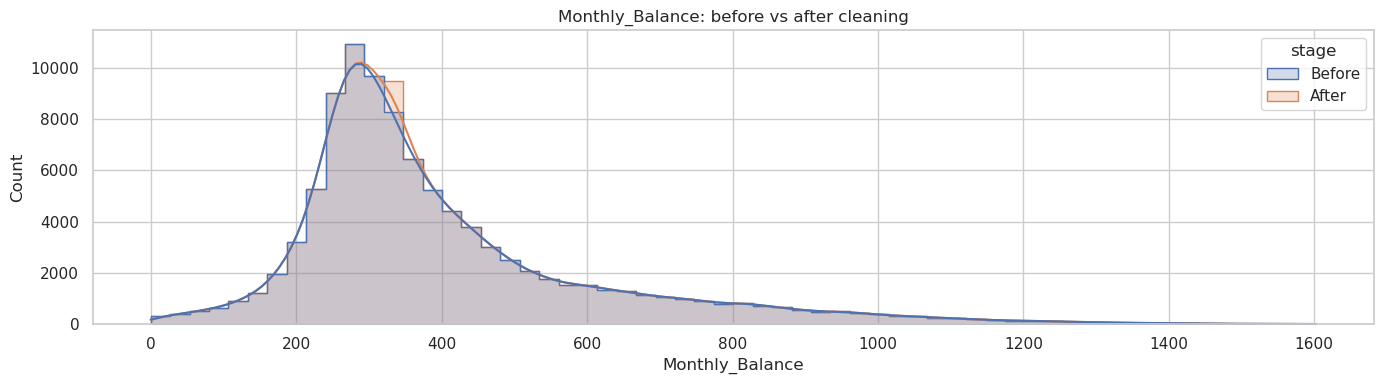

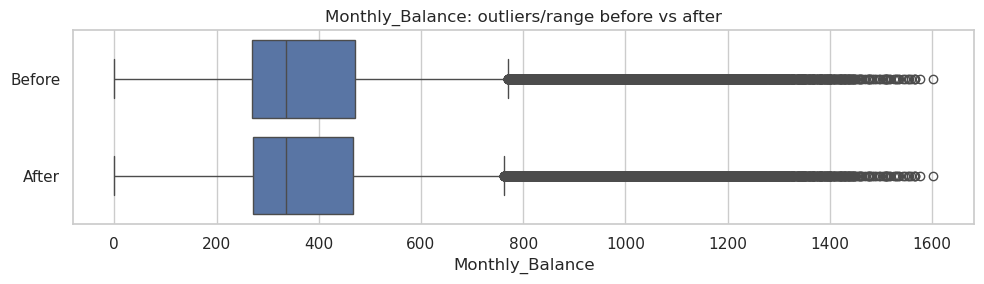

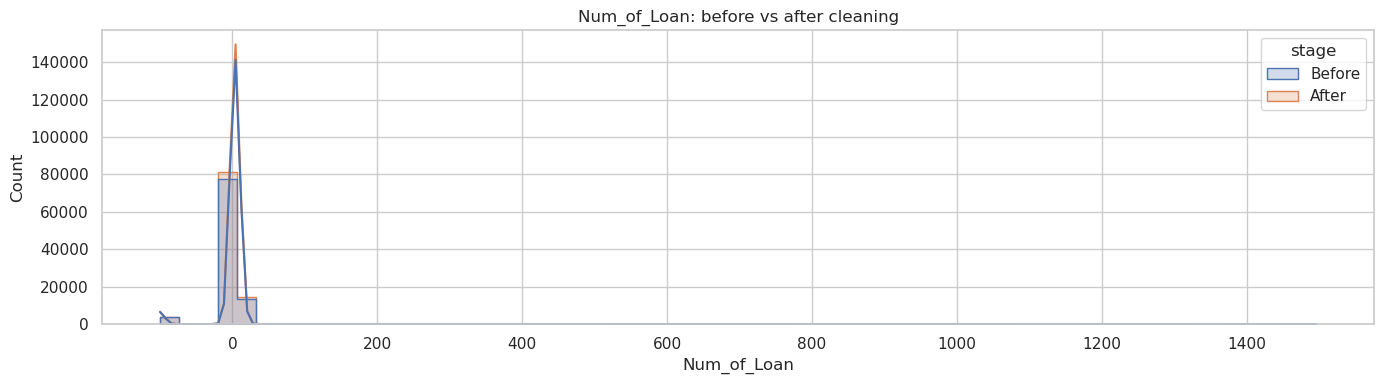

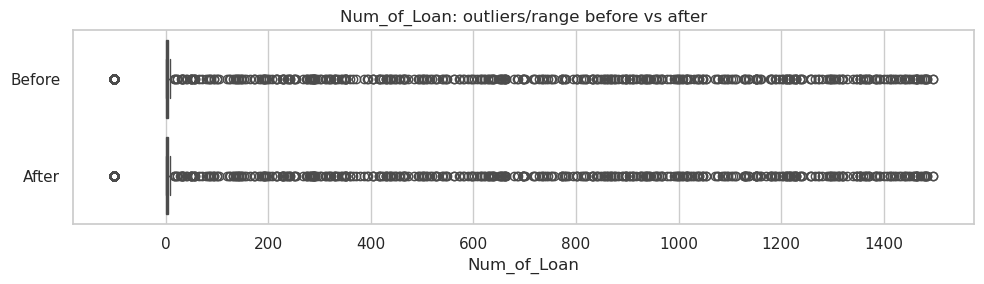

In [ ]:
plot_numeric_before_after_seaborn(df, df_clean, "Monthly_Balance")
plot_numeric_before_after_seaborn(df, df_clean, "Num_of_Loan")


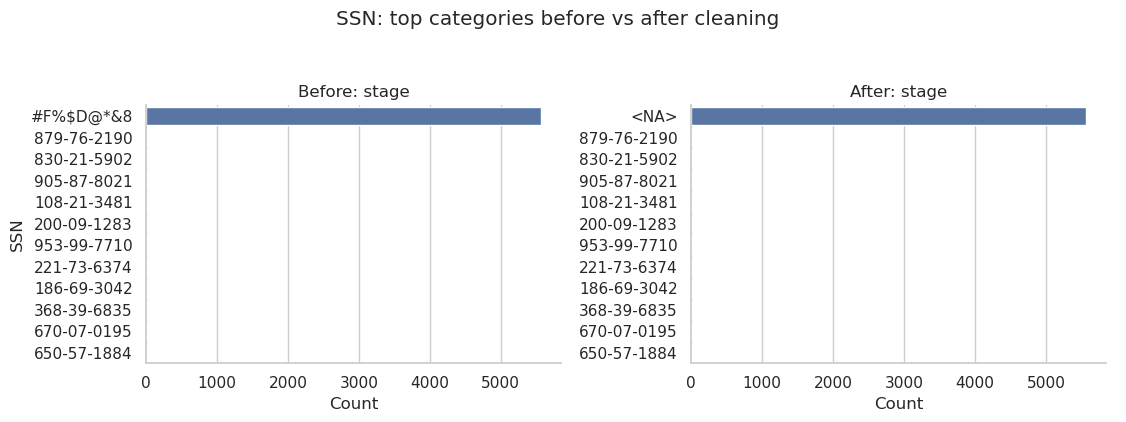

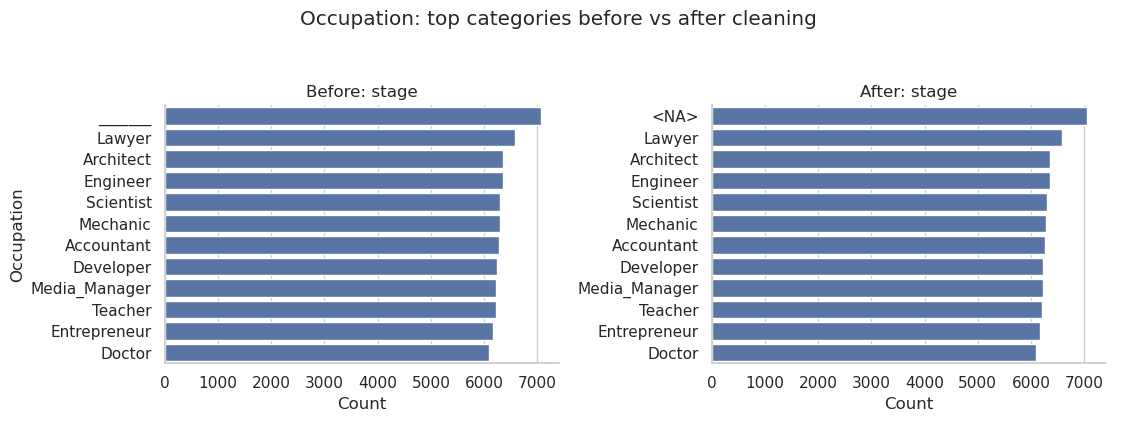

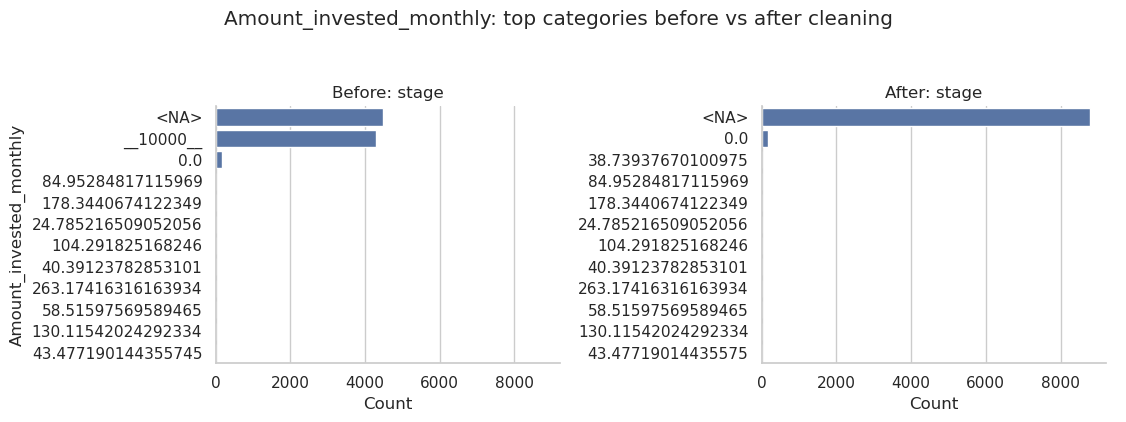

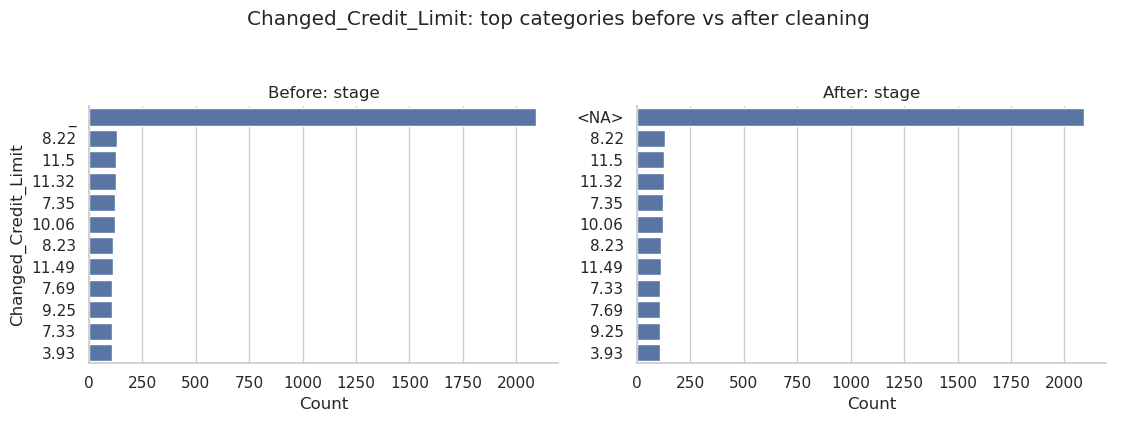

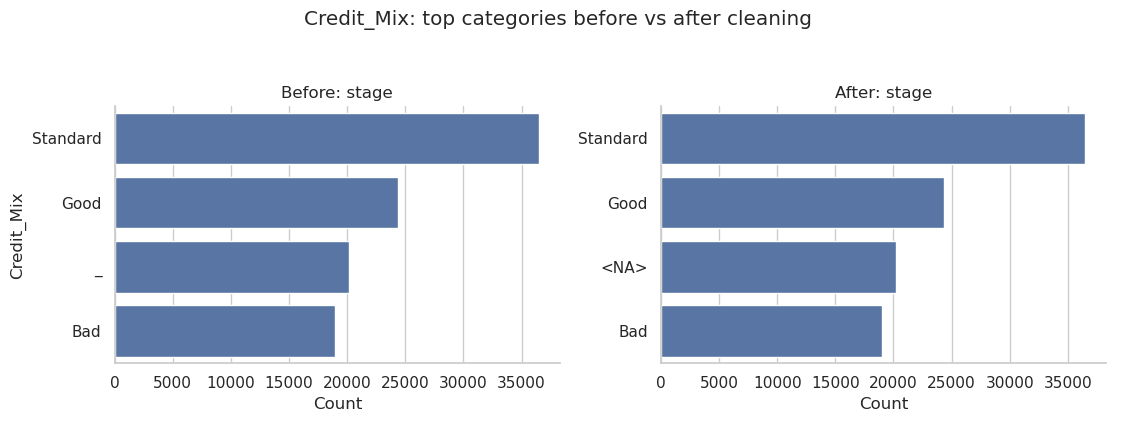

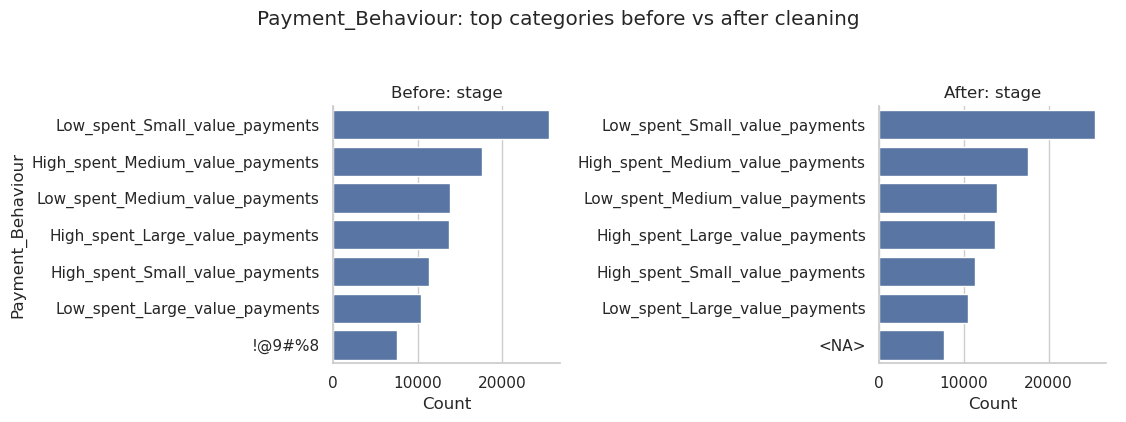

In [19]:
categorical_cols = [
    "SSN",
    "Occupation",
    "Amount_invested_monthly",
    "Changed_Credit_Limit",
    "Credit_Mix",
    "Payment_Behaviour",
]

for col in categorical_cols:
    plot_category_before_after_seaborn(df, df_clean, col, topn=12)


In [ ]:
import importlib.util
from pathlib import Path

cfg_path = Path("/home/nikita/Credit-Score-Classification/src/preprocessing_config.py") 
spec = importlib.util.spec_from_file_location("preprocessing_config", cfg_path)
cfg = importlib.util.module_from_spec(spec)
spec.loader.exec_module(cfg)

STEP_CONFIGS = cfg.STEP_CONFIGS

rows = []
for cfg in STEP_CONFIGS:
    col = cfg["column"]
    raw = df[col]

    numeric = pd.to_numeric(raw, errors="coerce")
    invalid = raw.notna() & numeric.isna()

    rows.append({
        "column": col,
        "invalid_share_%": 100 * invalid.mean(),
        "missing_share_%": 100 * raw.isna().mean(),
    })

stat = pd.DataFrame(rows).sort_values("invalid_share_%", ascending=False)

plt.figure(figsize=(12, 4))
sus.barplot(data=stat, x="invalid_share_%", y="column")
plt.title("Share of invalid/corrupted values before cleaning (by preprocessing_config columns)")
plt.xlabel("Invalid values (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

stat


FileNotFoundError: [Errno 2] No such file or directory: '/home/nikita/Credit-Score-Classification/notebooks/src/preprocessing_config.py'